# 🏝️ The Call from the Caribbean

Warm winds sweep across the Caribbean as the quantum-pirate ship sails through turquoise waters. Suddenly, one of the scientist-pirates hauls a message in a bottle from the sea. Inside lies a letter that reads:

> To the pirate crew,
> 
> This is a call for help. A treasure has been found—yet it is far more complicated than it seems.
> 
> The names are **Eli Vey** and **Vaid Mar**, two legendary pirate-scholars known for their daring adventures and cunning minds. After years of searching, fragments of the writings of the last Great Pirate Princess have finally been discovered. They hold knowledge long thought lost to the tides of time.
> 
> But beware—before her disappearance, the Princess used a peculiar kind of parchment with strange quantum properties. She hid the writings inside countless identical treasure chests. Some hold fragments, others are completely empty. From the outside, none can be told apart.
> 
> The danger lies in opening them. If a chest with a parchment is opened, the fragile fragment crumbles into dust, and the knowledge is lost forever. If the chest is empty, nothing happens—but nothing is gained either. The task is to reveal which chests hold the true writings without destroying them.
> 
> By the evening of November 4, 2025, as many chests as possible must be examined to learn which contain fragments and which are empty. Caution and cleverness will be required—each step must be taken with care.

Those willing to embark on this quest are invited to gather in the secret laboratory. To reach it, the following code must be executed successfully:

In [1]:
# Please do not change this code. Use this to check your installation.
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

import math
import numpy as np

from typing import Dict, Tuple

from qiskit import QuantumCircuit, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister, Parameter
from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="skopt")


## ⚓ Before You Set Sail

Throughout the problem instances, there are hints tucked away in hidden dropdown sections. Don’t be afraid to use them if you get stuck or would like some guidance.  

In particular, for the second problem, we strongly recommend consulting the **first hint section**. Only attempt it without the hints if you’re feeling confident and crave a true challenge.  

Enough chatter on deck — hoist the sails, man the photon cannons, and let’s chart a course through these quantum seas! 🏴‍☠️


# ⚗️ The Secret Laboratory

Gratitude to all who answered the call.
Welcome to the secret laboratory, where preparations for the expedition are underway. During the voyage, an ancient tome revealed the location of the island where the Princess once inscribed her writings. Within a forgotten temple, fragments of the same parchment and several identical chests were recovered.

Here, in the safety of the lab, these replicas serve for training and experimentation. The goal is to understand how the enchanted chests behave—before confronting the real ones, where a single mistake could destroy knowledge that cannot be restored.

Here is a single training chest, identical to those used by the Pirate Princess.
To take a closer look, run the next code cell:

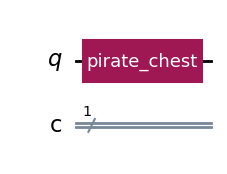

A treasure chest! What could be inside?


In [2]:
qc = QuantumCircuit(1, 1)

pirate_chest = QuantumCircuit(1, name="pirate_chest") 
qc.append(pirate_chest, [0])       

display(qc.draw(output='mpl'))

print("A treasure chest! What could be inside?")

## ☠️ A Chest That Must Not Be Opened

A pirate chest is, in truth, a mystery box — a black box of secrets!  
We can’t look inside, for even the smallest peek destroys whatever parchment might lie within.  
So how, in all the seven seas, are we to learn what’s inside without opening it!?

That’s when fortune smiled upon the crew once more. Deep within the Pirate Princess’s ruined temple, buried under coral and time, the explorers found a strange contraption of glass and mirrors — a device unlike any telescope or compass they’d ever seen.

*(Below: the recovered schematic, drawn by one of the braver pirates before the thing started humming on its own…)*

<p align="center">
  <img src="./images/MZI.png" width="750"/>
</p>

> **The Mack–Zenn Dar [Interferometer](https://en.wikipedia.org/wiki/Interferometry).**

At first, the crew had no clue what to make of it — a shimmering box at one end (marked with a star), two full mirrors (blue), and two half-mirrors (gray), which let some light through while reflecting the rest.  
When they shone light upon it, the beams danced and split like moonlight on the waves. No one could tell where the light would end up!

Weeks passed in confusion until two clever mates, **Captain Mack** and **Quartermaster Zenn Dar**, decoded the device with help from the Princess’s hidden journal. Here’s what they learned:

1. The **star box** was a *[photon source](https://en.wikipedia.org/wiki/Single-photon_source)* — a device that releases single particles of light (*photons*), each a quantum wanderer.  
2. The **(dark blue) mirrors** reflect these photons completely, just as ordinary mirrors do.  
3. The **(gray) half-mirrors**, or *[beam splitters](https://en.wikipedia.org/wiki/Beam_splitter)*, divide the light’s path — part through, part reflected — allowing two paths to exist at once.  
   When the split beams meet again, they **interfere**, revealing hidden information about what lies along their journey.
4. The **(purple and blue) detectors** stand sentinel at the ends of the paths. Whenever a photon arrives, they **click**, announcing the tiny quantum traveler’s arrival and revealing clues about its journey through the interferometer.

It was then that the pirates realized:  
perhaps, by sending photons through this device, they could *test* the chests… without ever opening them.


## 🧭 The Princess’s Quantum Legacy

It seems the Pirate Princess was centuries ahead of her time — a true scholar of the seas!  
No wonder her name became legend, you think to yourself.

But Captain Mack and Quartermaster Zenn Dar were not done yet.  
After decoding the strange interferometer, they realized it could do far more than bend beams of light. The Princess’s device could be used to **probe the mysterious treasure chests themselves** — to tell whether parchment was hidden inside, *without ever opening them!*

In honor of this astonishing discovery, the crew named the setup **the Mack–Zenn Dar Interferometer**.  
Below is a depiction of their modified contraption, now with a single chest placed in the upper branch:

<p align="center">
  <img src="./images/MZI_with_chest_P_C.png" width="750"/>
</p>

This time, the pirates modeled the experiment using **two qubits**, as guided by the Princess’s manuscripts:

- The first qubit represents the **photon’s path** after the first beam splitter.  
  - $|0_P\rangle$ → the *upper* path  
  - $|1_P\rangle$ → the *lower* path  
- The second qubit represents the **state of the parchment** inside the chest.  
  - $|0_C\rangle$ → parchment **intact**  
  - $|1_C\rangle$ → parchment **destroyed**

*(Labels: P – Path, C – Chest)*

---

### 📜 Captain Mack’s Logbook

> “We send a lone photon through the first beam-splitter, tuned to a phase of 45 degrees — a perfect balance: half through, half reflected.  
> 
> If the photon drifts along the lower branch, it sails clear of the chest and the parchment remains unharmed.  
> 
> Should it take the upper route, however, it meets the parchment head-on — and the fragile fragment is lost to dust.  
> 
> Here lies the trick: the photon’s **path** becomes entangled with the parchment’s **fate**.  
> 
> When the beams meet again at the second splitter, two detectors await at the exits.  
> 
> Through this cunning setup, we can detect the presence of parchment without opening the chest **25 % of the time**.  
> Another 25 % leaves us uncertain, and half the time… well, there’s a mighty *BOOM!* as the parchment perishes.  
> 
> Still, mates, this is a grand success — proof that knowledge itself can whisper to us without being seen.”  

---

The pirates had done it: they could now sense the unseen — a true triumph of quantum cunning.


## ⚓️ Recreating the Princess’s Device

Captain Mack and Quartermaster Zenn Dar, eager to prove the Princess’s design, set out to rebuild her interferometer using the strange new magic of *quantum circuits*.  
What follows is their reconstruction of the **Mack–Zenn Dar Interferometer**, complete with a mysterious chest waiting in the upper branch.

Creating MZI circuit with chest...


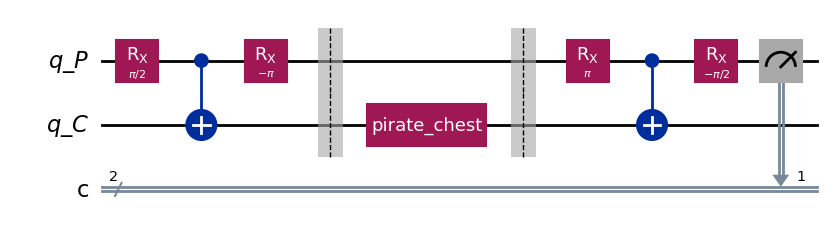

In [3]:
# Don't change this code
from qiskit.circuit import QuantumRegister, ClassicalRegister

def create_mzi_with_chest_circuit(replace_measurement=False, plot=True):
    qr_p = QuantumRegister(1, 'q_P')
    qr_c = QuantumRegister(1, 'q_C')
    cl_r = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr_p, qr_c, cl_r, name="MZI_with_chest_P_C")

    # First beam-splitter
    qc.rx(np.pi/2, qr_p[0])
    # Interaction between photon and chest
    qc.cx(qr_p[0], qr_c[0])
    # Mirror in upper path
    qc.rx(-np.pi, qr_p[0])
    qc.barrier()

    if replace_measurement:
        # Replace the chest with a direct measurement
        qc.measure(qr_c[0], 0)
    else:
        # Add a symbolic chest block
        pirate_chest = QuantumCircuit(1, name="pirate_chest")
        qc.append(pirate_chest, [1])

    qc.barrier()
    # Mirror in lower path
    qc.rx(np.pi, qr_p[0])
    # Second interaction
    qc.cx(qr_p[0], qr_c[0])
    # Second beam-splitter
    qc.rx(-np.pi/2, qr_p[0])

    # Measurement of the photon's path
    qc.measure(qr_p[0], cl_r[1])

    if plot:
        display(qc.draw(output='mpl'))

    return qc

print("Creating MZI circuit with chest...")
qc_with_block = create_mzi_with_chest_circuit(replace_measurement=False, plot=True)

In the Princess’s design, the **parchment itself** serves as the point of interaction — effectively acting as a measurement device.  
If the photon’s path passes through the chest and encounters the parchment, the interaction collapses its state, revealing whether the paths interfered or not.  
In our circuit, this interaction is modeled explicitly below:

Creating MZI circuit with direct measurement, i.e., parchment inside chest...


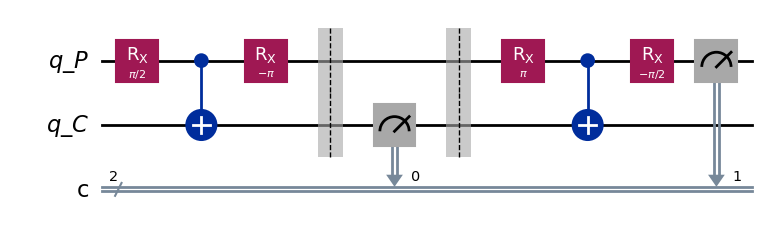

In [4]:
# Please do not change this code
print("Creating MZI circuit with direct measurement, i.e., parchment inside chest...")
qc_with_measurement = create_mzi_with_chest_circuit(replace_measurement=True, plot=True)

# If there were no parchment inside the chest, there would be no measurement on q_C,
# and the photon would always end up in the same output port.
# If there is parchment inside the chest, measuring q_C collapses the photon's state,
# leading to a 50/50 chance of finding it in either output port.

## 🔮 Understanding the Quantum Trick

The pirates wrote careful notes to guide future crews in decoding the behavior of this circuit.  
They begin their analysis as follows:

1. **Initial state:** start with $|00\rangle_{PC}$ — the photon on the lower path, the parchment intact.  
2. **First beam-splitter:** apply $R_x(\pi/2)$ to the path qubit.  
   $$
   \frac{1}{\sqrt{2}}\big(|00\rangle_{PC} - i|10\rangle_{PC}\big)
   $$
3. **Chest interaction (CNOT):** couples photon path and parchment.  
   $$
   \frac{1}{\sqrt{2}}\big(|00\rangle_{PC} - i|11\rangle_{PC}\big)
   $$
   In other words, if the photon takes the *upper* path, the parchment crumbles.
4. **Mirror in the upper path:** apply $R_x(-\pi)$ to the path qubit (upper branch).  
   $$
   \frac{-i}{\sqrt{2}}\big(|10\rangle_{PC} - i|01\rangle_{PC}\big)
   $$
   This reflects the photon in the upper branch without affecting the parchment qubit’s state.
5. **Loss of coherence:** if parchment is present, interference between paths vanishes. This can be modeled by a measurement on the path qubit ($P$).
6. **Second beam-splitter:** recombines the paths; the measurement reveals whether interference survived. Note that this information is **statistical** — a single trial only outputs one bit-string (e.g., $00$). Some outcomes provide enough information to infer whether parchment is in the chest, while others do not, so many trials are required to build a reliable picture.

If there is no parchment in the chest placed within the interferometer (i.e., there is **no measurement on the path qubit $q_P$** corresponding to a parchment interaction), the circuit acts like the **identity** — we start and end with $|00\rangle_{PC}$, learning nothing new.  
The second half of the circuit mirrors the first, leaving the state untouched and preserving this symmetry.  
But once parchment lies within, subtle shifts in interference begin to whisper secrets about what’s hidden inside.

## 🧩 The Final Piece of the Puzzle

The last mystery lies in how we **measure the photon’s path**.

- The measured $0$ or $1$ on the path qubit corresponds to the two exits of the final beam-splitter (see the figure above — the right-most <span style="color:purple">purple</span> and <span style="color:blue">blue</span> arrows connected to detectors $D_P$ ($0$) and $D_B$ ($1$), respectively).  
- Measuring $|00\rangle_{PC}$ gives us no new insight, since this could occur whether a parchment is present or not.  
- Measuring $|10\rangle_{PC}$ is the moment of triumph: it tells us there *is* parchment in the chest, and yet it remains intact!  
- If we measure $|1_C\rangle$ on the chest qubit, the lab echoes with the dreaded **BOOM!**, the sound of a parchment lost forever.

**Hint for the crew:**  
Consider the possible outcomes (both beam-splitters are **balanced**, so each photon has a 50/50 chance of being reflected or transmitted at each splitter):

1. **No parchment present:** always ($100\%$) measure $|00\rangle_{PC}$.  
2. **Parchment present:**  
   - $25\%$ measure $|00\rangle_{PC}$ (photon took the lower path, no interaction with the parchment, detected in $D_P$);  
   - $25\%$ measure $|10\rangle_{PC}$ (photon took the lower path, no interaction with the parchment, detected in $D_B$; **non-destructive detection**, parchment intact).  
3. **Parchment present:** $50\%$ measure $|1_C\rangle$ — the dreaded **BOOM!**, parchment destroyed.

Even the explosion tells a story, giving information about the chest’s contents despite the loss.


Thus, the Mack–Zenn Dar Interferometer becomes more than a curiosity;  
it is a *quantum oracle of the seas*, capable of sensing the unseen and preserving the priceless.

## 🏴‍☠️ Testing the Seas: 1000 Chests

The crew, cautious after witnessing the perils of a single chest, discovered a **secret vault deep within the Princess’s temple**.  
Here lay **hundreds, even thousands of identical replica chests** — perfect for practicing the Mack–Zenn Dar Interferometer without risking real parchments.  
With a hearty laugh, the pirates decided to run their circuit on **1000 of these training chests** to see how often parchment could be detected safely.

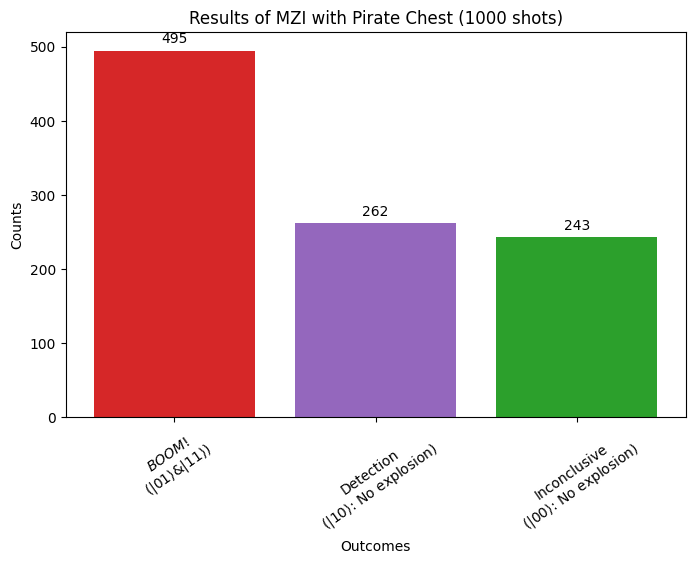

In [5]:
# Please do not change this code
def run_mzi_simulation(qc, shots=1000):
    """Run the circuit on AerSimulator and return raw counts."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    counts = result.get_counts(compiled_circuit)
    return counts

# In Qiskit, qubits are ordered using little-endian notation, with the least significant qubits having smaller indices.
# https://quantum.cloud.ibm.com/docs/en/api/qiskit/quantum_info#schmidt_decomposition
def categorize_counts(counts):
    """
    Map raw measurement outcomes to three categories:
      - Explosion: '01' or '11' → BOOM!
      - Parchment detected without explosion: '10'
      - No detection, no explosion: '00'
    Returns a dictionary suitable for plotting.
    """
    explosion_count = counts.get('01', 0) + counts.get('11', 0)
    parchment_detected_count = counts.get('10', 0)
    nothing_detected_count = counts.get('00', 0)

    labels = [r'$BOOM!$' + '\n' + r'($|01\rangle & |11\rangle$)',
              'Detection' + '\n' + r'($|10\rangle$: No explosion)',
              'Inconclusive' + '\n' + r'($|00\rangle$: No explosion)']

    categorized = {
        labels[0]: explosion_count,          # red
        labels[1]: parchment_detected_count, # purple
        labels[2]: nothing_detected_count    # green
    }
    return categorized, labels

def plot_mzi_results(categorized_counts, title='Results of MZI with Pirate Chest'):
    """Plot a 3-bar histogram with colors, counts above bars, and angled x-axis labels."""
    colors = ['tab:red', 'tab:purple', 'tab:green']
    plt.figure(figsize=(8, 5))
    bars = plt.bar(categorized_counts.keys(), categorized_counts.values(), color=colors)
    plt.ylabel('Counts')
    plt.xlabel('Outcomes')
    plt.xticks(rotation=35)
    plt.title(title)

    # Add counts above bars
    for i, v in enumerate(categorized_counts.values()):
        plt.text(i, v + max(categorized_counts.values())*0.02, str(v), ha='center')

    plt.show()

# --- Example usage ---
shots = 1000
counts = run_mzi_simulation(qc_with_measurement, shots=shots)
categorized_counts, labels = categorize_counts(counts)
# MZI stands for "Mack-Zenn Dar Interferometer"
plot_mzi_results(categorized_counts, title='Results of MZI with Pirate Chest (1000 shots)')


As the results appeared, the statistics told a familiar story:  
roughly **25% of the time**, the photon detected the parchment without destroying it, while **50% ended with the dreaded BOOM!**, and **25% yielded no new information**.  

---

### ⚗️ The Eli–Vey Score

To quantify their success, the pirates devised a clever measure: the **Eli–Vey score (EV score)** — the ratio of successful detections to explosions, **penalized for inconclusive outcomes**, named in honor of the legendary sea-scholars **Eli Vey** and **Vaid Mar**:

$$
EV = \frac{\text{Prob(Detection)}}{\text{Prob(\emph{BOOM!}) + $\epsilon$}} \cdot \exp\Big(-\text{Prob(Inconclusive)}\Big)
$$

Here, $\epsilon$ (epsilon) is a tiny constant added to keep the ratio well-behaved in extreme cases — when the chance of an explosion becomes vanishingly small, $\epsilon$ prevents the score from blowing up to infinity.

Plugging in the observed numbers:

- Prob(Detection) = 0.25  
- Prob(BOOM!) = 0.50  
- Prob(Inconclusive) = 0.25  


we get:

$$
EV = \frac{0.25}{0.50} \cdot \exp(-0.25) \approx 0.50 \cdot 0.7788 \approx 0.389
$$

Thus, the **adjusted EV score** accounting for inconclusive trials is roughly **0.39**, reflecting both the ratio of detections to explosions and the efficiency loss due to repeated inconclusive outcomes.

Numerical simulation confirmed the analytical prediction:


In [6]:
# Please do not change this code
# Extract counts/probabilities from the categorized dictionary
prob_explosion = categorized_counts[labels[0]]/shots
prob_detection = categorized_counts[labels[1]]/shots
prob_nothing = categorized_counts[labels[2]]/shots
epsilon = 1e-10  # Small constant to avoid division by zero

# Compute Eli–Vey score
EV_score = prob_detection / (epsilon + prob_explosion) * np.exp(-prob_nothing)
print(f'Eli-Vey Score (EV score): {EV_score:.3f}')

# Note that if you run this cell multiple times,
# the counts and EV score may vary due to the probabilistic nature of quantum measurements.

Eli-Vey Score (EV score): 0.415


### 🧩 A Pirate’s Challenge

<div class="alert alert-block alert-success">

**🏴‍☠️ Challenge – Quest for the Parchment:**

The pirates were not content with a mere 39% success rate.  
Their ambition: **extract as much knowledge from the chests as possible without destroying the parchments**.  

**Can you help the crew improve the EV score?**  

- Recall the **beam-splitters have tunable phases** — adjusting the RX gates' parameters changes the balance of the interferometer.  
- Even small changes in these angles can increase the chance of detecting parchment without triggering the dreaded BOOM!  
- Anything better than 39% is a worthy achievement; the true masters of the seas might even find the optimal combination(s).

<details>
<summary>Hints for clever pirates – Part 1</summary>

- Think of the **Eli–Vey Bomb Tester** and its principles. In case you didn't catch it, this refers to the [Elitzur-Vaidman Bomb Tester](https://en.wikipedia.org/wiki/Elitzur%E2%80%93Vaidman_bomb_tester), based on a [Mach-Zehnder interferometer](https://en.wikipedia.org/wiki/Mach%E2%80%93Zehnder_interferometer).  
- Remember: if the first beam-splitter has phase $\alpha$, the second should have phase $-\alpha$, although you are welcome to experiment with different phases on the two beam-splitters.
- Feel free to change the number of shots — that is, the number of treasure chests tested. More shots give more accurate statistics, but at the cost of longer simulation times.

</details>

<details>
<summary>Hints for clever pirates – Part 2</summary>

- The biggest clue is to experiment with different beam-splitter angles to boost your chances of **non-destructive detection**, while keeping both the risk of a **BOOM!** and the number of **inconclusive trials** as low as possible — since too many “nothing happened” outcomes will drag down your Eli–Vey score through the exponential penalty.
You can approach this from a mathematical or physical point of view to find the optimal phase value(s), or use a brute-force simulation by sweeping through a list of angles (the [`Parameter`](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.Parameter) class can be useful for this). Both strategies are valid.
- Note that the optimal value is unlikely to be something “pretty” — the exponential penalty twists the landscape of the Eli–Vey score, shifting the sweet spot away from neat, round angles.
- Think like a clever pirate: test, observe, and refine your strategy to maximize the Eli–Vey score!  

</details>

</div>

In [7]:
# You are free to use the snippets provided above as needed.
GLOBAL_SEED = 42
SIM = AerSimulator(seed_simulator=GLOBAL_SEED)
RNG = np.random.default_rng(GLOBAL_SEED)

# keys
BOOM_KEYS    = {"11"}        # chest=1, path=1  (boom)
DETECT_KEYS  = {"10"}        # chest=1, path=0  (detect w/o boom)
NOTHING_KEYS = {"00","01"}   # chest=0, path=0/1 (nothing)

# Parameters 
THETA1 = Parameter("theta1")  
THETA2 = Parameter("theta2")  


In [8]:
GLOBAL_SEED = 42
SIM = AerSimulator(seed_simulator=GLOBAL_SEED)
RNG = np.random.default_rng(GLOBAL_SEED)

# keys
BOOM_KEYS    = {"11"}        # chest=1, path=1  (boom)
DETECT_KEYS  = {"10"}        # chest=1, path=0  (detect w/o boom)
NOTHING_KEYS = {"00","01"}   # chest=0, path=0/1 (nothing)

# Parameters 
THETA1 = Parameter("theta1")  
THETA2 = Parameter("theta2")  

In [9]:
# Build circuit 
def build_circuit(replace_measurement: bool = False):
    """
    MZI-style circuit with two tunable RX angles (THETA1, THETA2).
    Bit mapping: c[0]=path (right bit), c[1]=chest (left bit).
    If replace_measurement=True, we measure chest early and DO NOT apply any further CX to chest.
    """
    qr_p = QuantumRegister(1, 'q_P')   # path
    qr_c = QuantumRegister(1, 'q_C')   # chest
    cl_r = ClassicalRegister(2, 'c')   # c[0]=path, c[1]=chest
    qc = QuantumCircuit(qr_p, qr_c, cl_r, name="MZI_with_chest_P_C")

    # First beam-splitter 
    qc.rx(THETA1, qr_p[0])

    # First interaction
    qc.cx(qr_p[0], qr_c[0])

    # Mirror in upper path
    qc.rx(-np.pi, qr_p[0])
    qc.barrier()

    if replace_measurement:
        # Early measurement of chest breaks interference -> no further CX with chest
        qc.measure(qr_c[0], cl_r[1])     # chest -> c1
    else:
        # Erase which-path info coherently (as в задании)
        qc.cx(qr_p[0], qr_c[0])

    qc.barrier()

    # Mirror in lower path 
    qc.rx(np.pi, qr_p[0])

    # Second interaction ONLY if we did NOT measure chest early
    if not replace_measurement:
        qc.cx(qr_p[0], qr_c[0])

    # Second beam-splitter
    qc.rx(THETA2, qr_p[0])

    # Final measurements
    qc.measure(qr_p[0], cl_r[0])         # path -> c0
    if not replace_measurement:
        qc.measure(qr_c[0], cl_r[1])     # chest -> c1 (if not measured early)

    return qc


In [10]:
def run_simulation(qc, shots: int = 1000):
    _seed = GLOBAL_SEED if 'GLOBAL_SEED' in globals() else 42
    _sim  = SIM if 'SIM' in globals() else AerSimulator(seed_simulator=_seed)
    tqc = transpile(qc, _sim, optimization_level=1, seed_transpiler=_seed)
    res = _sim.run(tqc, shots=shots).result()
    return res.get_counts()

def categorize_probs(counts):
    shots = sum(counts.values()) or 1
    p_boom    = sum(counts.get(k, 0) for k in BOOM_KEYS)    / shots
    p_detect  = sum(counts.get(k, 0) for k in DETECT_KEYS)  / shots
    p_nothing = sum(counts.get(k, 0) for k in NOTHING_KEYS) / shots
    return p_boom, p_detect, p_nothing

def categorize_counts(counts):
    return {
        "BOOM":    sum(counts.get(k, 0) for k in BOOM_KEYS),
        "DETECT":  sum(counts.get(k, 0) for k in DETECT_KEYS),
        "NOTHING": sum(counts.get(k, 0) for k in NOTHING_KEYS),
    }


In [11]:
# evaluate function
import math

def ev_from_counts(counts: dict[str, int], eps: float = 1e-10) -> float:
    p_boom, p_detect, p_nothing = categorize_probs(counts)
    return (p_detect / (eps + p_boom)) * math.exp(-p_nothing)

In [12]:
# helper
def bind_params(qc, theta1: float, theta2: float):
    mapping = {}
    for p in qc.parameters:
        if p.name == "theta1":
            mapping[p] = float(theta1)
        elif p.name == "theta2":
            mapping[p] = float(theta2)
    qc_bound = qc.assign_parameters(mapping, inplace=False)

    if len(qc_bound.parameters) != 0:
        missing = {p.name for p in qc_bound.parameters}
        raise RuntimeError(f"Unbound parameters remain in circuit: {missing}")
    return qc_bound

def run_ev(theta1: float, theta2: float, shots: int = 4000, reps: int = 3) -> float:
    values = []
    for _ in range(reps):
        qc_param = build_circuit(replace_measurement=False)
        qc_bound = bind_params(qc_param, theta1, theta2) 
        counts = run_simulation(qc_bound, shots=shots)
        values.append(ev_from_counts(counts))
    return float(np.mean(values))

**Bayesian optimization** of RX angles θ1, θ2
In our experiment, we needed to find the best rotation angles (θ₁ and θ₂) that give the highest Eli–Vey score.
Each test requires running a full quantum circuit simulation with thousands of shots, so trying all possible angle combinations would take too long.**Bayesian optimization** was a choice because it can find the best values efficiently and it learns from each result and predicts which angles are worth testing next. It also works when the results are a bit noisy, which happens naturally.


In [13]:
from skopt import gp_minimize
from skopt.space import Real

# Search space (as in assignment)
SPACE = [
    Real(0.35 * np.pi, 0.65 * np.pi, name="theta1"),   # around +π/2
    Real(-0.65 * np.pi, -0.35 * np.pi, name="theta2"), # around -π/2
]

def bayes_optimize(n_calls: int = 35, n_initial_points: int = 8,
                   shots_schedule=(1500, 3000, 6000),
                   reps_schedule=(2, 3, 4)):
    warm_x0 = [
        [np.pi/2, -np.pi/2],
        [0.48*np.pi, -0.52*np.pi],
        [0.52*np.pi, -0.48*np.pi],
        [0.50*np.pi, -0.50*np.pi],
    ]

    best = {"ev": -1.0, "theta1": None, "theta2": None}

    def make_objective(shots, reps):
        def _objective(x):
            t1, t2 = x
            return -run_ev(t1, t2, shots=shots, reps=reps)
        return _objective

    res_prev = None
    for stage, (shots, reps) in enumerate(zip(shots_schedule, reps_schedule), start=1):
        objective = make_objective(shots, reps)
        x0 = [res_prev.x] if res_prev is not None else warm_x0

        res = gp_minimize(
            func=objective,
            dimensions=SPACE,
            x0=x0,
            n_calls=n_calls,
            n_initial_points=n_initial_points,
            acq_func="EI",
            random_state=GLOBAL_SEED + stage
        )

        res_prev = res
        ev_here = -res.fun
        if ev_here > best["ev"]:
            best.update({"ev": ev_here, "theta1": res.x[0], "theta2": res.x[1]})

        print(f"Stage {stage}: shots={shots}, reps={reps}, best EV={best['ev']:.5f}")

    # Final confirmation
    best["ev_final"] = run_ev(best["theta1"], best["theta2"], shots=20000, reps=5)
    return best


In [14]:
import matplotlib.pyplot as plt

def plot_outcome_hist(theta1: float, theta2: float, shots: int = 12000, title: str = ""):
    qc_param = build_circuit(replace_measurement=False)
    qc_bound = bind_params(qc_param, theta1, theta2)
    counts = run_simulation(qc_bound, shots=shots)

    p_boom, p_detect, p_nothing = categorize_probs(counts)
    probs = [p_boom, p_detect, p_nothing]
    cats = ["BOOM", "DETECT", "NOTHING"]

    plt.figure(figsize=(7, 4.5))
    bars = plt.bar(cats, probs, color=["tab:red", "tab:purple", "tab:green"])
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    if not title:
        title = f"Outcome probabilities @ θ1={theta1:.3f}, θ2={theta2:.3f}"
    plt.title(title)
    plt.grid(axis="y", alpha=0.3)

    for i, v in enumerate(probs):
        plt.text(i, v + 0.02, f"{v:.3f}", ha="center", fontsize=10)

    plt.show()
    return counts

def print_counts_summary(counts):
    """Print detailed probability summary."""
    shots = sum(counts.values()) or 1
    p_boom, p_detect, p_nothing = categorize_probs(counts)
    print(f"Shots: {shots}")
    print(f"p_boom = {p_boom:.4f}")
    print(f"p_detect = {p_detect:.4f}")
    print(f"p_nothing = {p_nothing:.4f}")
    print("Raw counts:", dict(sorted(counts.items())))


Binding ok
Running Bayesian optimization for θ₁, θ₂ ...
Stage 1: shots=1500, reps=2, best EV=2.19880
Stage 2: shots=3000, reps=3, best EV=2.19880
Stage 3: shots=6000, reps=4, best EV=2.19880

Best parameters found:
  θ₁ = 1.099557 rad
  θ₂ = -1.099557 rad
  EV (Bayes-opt) = 2.19880
  EV (final confirm) = 2.02709


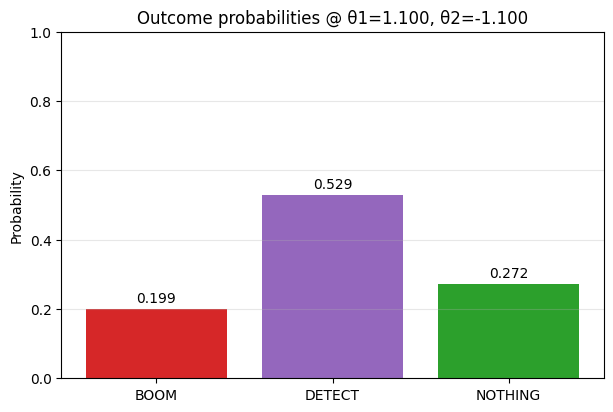

Shots: 20000
p_boom = 0.1987
p_detect = 0.5289
p_nothing = 0.2724
Raw counts: {'00': 1477, '01': 3971, '10': 10578, '11': 3974}


In [15]:
# running and evaluation the optimization

qc_test = build_circuit(False)
qc_bound = bind_params(qc_test, np.pi/2, -np.pi/2)
assert len(qc_bound.parameters) == 0
_ = run_simulation(qc_bound, shots=100)
print("Binding ok")

print("Running Bayesian optimization for θ₁, θ₂ ...")
best = bayes_optimize(n_calls=35, n_initial_points=8)
print("\nBest parameters found:")
print(f"  θ₁ = {best['theta1']:.6f} rad")
print(f"  θ₂ = {best['theta2']:.6f} rad")
print(f"  EV (Bayes-opt) = {best['ev']:.5f}")
print(f"  EV (final confirm) = {best['ev_final']:.5f}")

counts = plot_outcome_hist(float(best["theta1"]), float(best["theta2"]), shots=20000)
print_counts_summary(counts)

The values Bayes-opt and final confirm could differ slightly because the optimizer estimates EV using fewer simulation shots during the search, which introduces some statistical noise. When the final confirmation is done with many more shots, the result becomes more accurate and slightly smoother and could be a bit lower.

The interferometer now detects signals more than twice as often as it causes explosions, while keeping the number of inconclusive outcomes low. The results show that Bayesian optimization successfully found a stable and efficient configuration of the circuit.

Further improvements could include using more shots to reduce statistical noise, exploring a slightly wider range of angles, or testing other optimization methods such as gradient-based tuning

## ⚙️ The Curse of Efficiency

The crew rejoices!  
After months of tinkering below deck, you’ve outsmarted **Captain Mack** and **Quartermaster Zenn Dar**, crafting a method that preserves more parchments than ever before.  

But celebration is short-lived. The **Ship’s Timekeeper**, an old and cranky chronometer, starts spinning wildly. Each interferometry experiment has taken **far longer than expected** — the photon crystals need constant recalibration, mirrors fog in the island’s humidity, and spectral barnacles keep latching onto the beam-splitters.  

Now imagine repeating this process for **a thousand chests**.  
Weeks turn into months… and you realize that while your detection scheme is clever, it is *far from efficient*.

So the pirates gather once more in the lab’s candlelight, determined to test a new idea — **efficiency through strategy.**

---

### 🏴‍☠️ A Sea of Chests

This time, the parchment fragments are hidden not in a single chest, but in a **$4 \times 4$ grid** of identical chests:

<p align="center">
  <img src="./images/4x4_grid.png" width="250"/>
</p>

Running sixteen separate interferometers, one per chest, would take *ages*.  
You seek a way to test **several chests at once**, without losing the delicate power of quantum interference.

---

<div class="alert alert-block alert-success">

**⚙️ Challenge – The Curse of Efficiency**

Design a scheme to identify which chests contain parchment with **high likelihood**, while using the **fewest number of interferometry experiments possible**.  

Your results will be measured using the **modified Eli–Vey score**, defined as:

$$
EV^* = \frac{\text{EV score of each interferometry setup}}{\text{number of setups}}
$$

Assume all your interferometers are built with the **same beam-splitter angles**, so that each has the same individual EV score.

For instance, using the original Mack–Zenn Dar interferometer, running 16 separate setups, one per chest, would give us:

$$
EV^* = \frac{0.389}{16} \approx 2.431 \times 10^{-2}
$$

**Can you devise a cleverer approach that achieves a *higher* modified EV score?**

</div>

> Headcanon: Suppose you can build the same statistics as before (to compute the EV score), 
> but you don’t know the actual locations of the parchments.  
> In other words, you are only given access to the final measurement histograms.  
> Can you deduce where the parchments are from this information alone?

<div class="alert alert-block alert-info">

**Appendix: Implementation Example**

To test your approach, consider the grid below as your puzzle input — a map of chests scattered across the deck.  
**Legend**:  
- 🏴‍☠️ — empty chest  
- 📜 — chest hiding a precious parchment  

<table style="margin-left:auto; margin-right:auto;">
  <tr>
    <th>⚓</th><th>A</th><th>B</th><th>C</th><th>D</th>
  </tr>
  <tr>
    <td>1</td><td>🏴‍☠️</td><td>🏴‍☠️</td><td>🏴‍☠️</td><td>🏴‍☠️</td>
  </tr>
  <tr>
    <td>2</td><td>🏴‍☠️</td><td>🏴‍☠️</td><td>📜</td><td>📜</td>
  </tr>
  <tr>
    <td>3</td><td>🏴‍☠️</td><td>🏴‍☠️</td><td>🏴‍☠️</td><td>🏴‍☠️</td>
  </tr>
  <tr>
    <td>4</td><td>🏴‍☠️</td><td>🏴‍☠️</td><td>🏴‍☠️</td><td>🏴‍☠️</td>
  </tr>
</table>

In a real scenario, you wouldn’t know which chests hold parchment. Here, however, we provide this instance so you can test your algorithm and benchmark its performance. Feel free to try different arrangements as well, with more or fewer parchments, and mark your map wisely! 

</div>

---

### 🧭 Hints from the Quartermaster 

<details>
<summary> Hint #1: (click to expand)</summary>

- You are **not limited to testing one chest at a time**.  
  Several chests can be placed along the *test arm* of your interferometer.  
  (We recommend keeping chests only on one arm — though brave souls may try both!) 

</details>

<details>
<summary> Hint #2: (click to expand)</summary>

- One possible idea: test **rows or columns** of the grid at once.  
  For instance, letting the test arm run through a full column or row of four chests:

<p align="center">
  <img src="./images/4x4_grid_rows_columns.png" width="250"/>
</p>

Each measurement then tells you something about an entire *row or column*, not just a single chest.  

Note, however, that you’re **not limited to rows or columns of four chests**!  
Your piratey brilliance knows no bounds — *any interferometric configuration is fair game*.  
Lines, columns, diagonals, $2\times2$ chest squares, or even larger rectangles — if your quantum compass can chart it, you can test it.  

<div class="alert alert-block alert-warning">

That said, even the cleverest pirate-scientists must heed one restriction: the chosen chests should form **contiguous blocks** within the grid. After all, your photon(s) must physically weave its way through them, and guiding such delicate light across the deck without scattering it into the sea is no small feat.  

(And between us, anyone who’s ever aligned a photon path knows the true test of quantum coherence is keeping your own sanity intact.)

</details>

</div>

---

### 🔮 Questions to Guide Your Quest

<details>
<summary>Hint #3: (follow-up to Hint #1)</summary>

- What information does each multi-chest experiment actually reveal?  
- How can you use that information to **reconstruct** the parchment positions?  
- How must you **modify your quantum circuit** to include multiple chests? 


  <details>
  <summary>Hint #4: (click if you’re stuck)</summary>

  Simply add one extra qubit for each additional chest, and apply a **CNOT** from the **path qubit** to each **chest qubit** along the *test arm*.
  You can either simulate all 17 qubits at once (1 path + 16 chests) or use smaller circuits that test only the relevant subset of chests per interferometry run — the latter is generally recommended.
  </details>

</details>

---

Remember, every saved parchment is a victory — and every reduced experiment brings you closer to mastering the **Quantum Seas of Efficiency**.

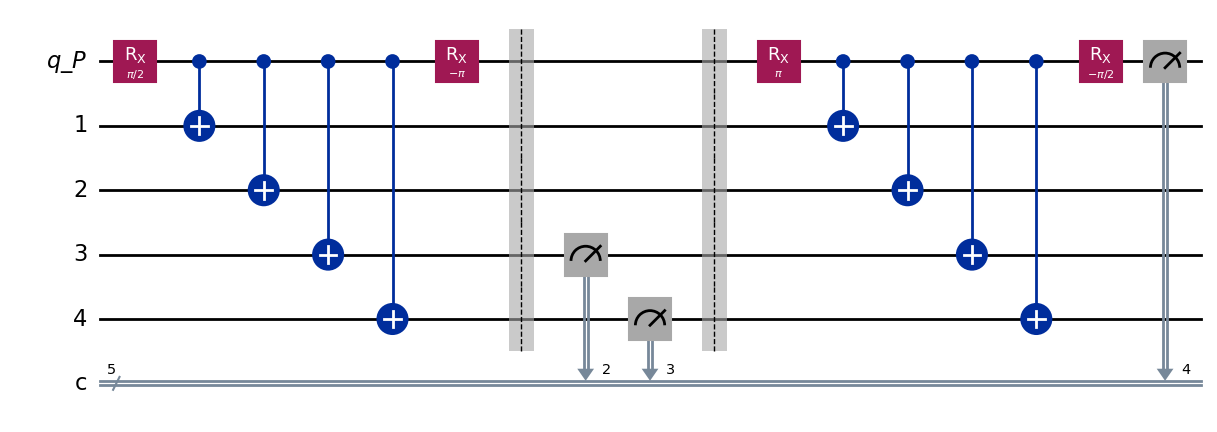

In [26]:
example_matrix = np.array([[0, 0, 0, 0],
                           [0, 0, 1, 1],
                           [0, 0, 0, 0],
                           [0, 0, 0, 0]])

def create_mzi_with_chest_circuit_matrix(plot=True, chest_list=example_matrix[1]):
    qr_p = QuantumRegister(1, 'q_P')
    qr_c = QuantumRegister(4, 'q_C') # 1 → 4
    cl_r = ClassicalRegister(5, 'c')
    qc = QuantumCircuit(qr_p, qr_c[:], cl_r, name="MZI_with_chest_P_4C")

    # First beam-splitter
    qc.rx(np.pi/2, qr_p[0])
    # Interaction between photon and chest
    for i in range(4):
        qc.cx(qr_p[0], qr_c[i])

    # Mirror in upper path
    qc.rx(-np.pi, qr_p[0])
    qc.barrier()

    for i in range(4):
        if chest_list[i] == 1:
            qc.measure(qr_c[i], cl_r[i])

    qc.barrier()
    # Mirror in lower path
    qc.rx(np.pi, qr_p[0])
    # Second interaction
    for i in range(4):
        qc.cx(qr_p[0], qr_c[i])
        
    # Second beam-splitter
    qc.rx(-np.pi/2, qr_p[0])

    # Measurement of the photon's path
    qc.measure(qr_p[0], cl_r[4])

    if plot:
        display(qc.draw(output='mpl'))

    return qc

def categorize_counts_matrix(counts):
    """
    Map raw measurement outcomes to three categories:
      - Explosion: 'XXX1' → BOOM!
      - Parchment detected without explosion: '1000'
      - No detection, no explosion: '0000'
    Returns a dictionary suitable for plotting.
    """
    total_counts = sum(counts.values())

    parchment_detected_count = counts.get('10000', 0)
    nothing_detected_count = counts.get('00000', 0)
    explosion_count = total_counts - parchment_detected_count - nothing_detected_count

    labels = [r'$BOOM!$' + '\n' + r'($|0WXYZ\rangle$)',
              'Detection' + '\n' + r'($|10000\rangle$: No explosion)',
              'Inconclusive' + '\n' + r'($|00000\rangle$: No explosion)']

    categorized = {
        labels[0]: explosion_count,          # red
        labels[1]: parchment_detected_count, # purple
        labels[2]: nothing_detected_count    # green
    }
    return categorized, labels

qc_with_block = create_mzi_with_chest_circuit_matrix()


# Collumn  0


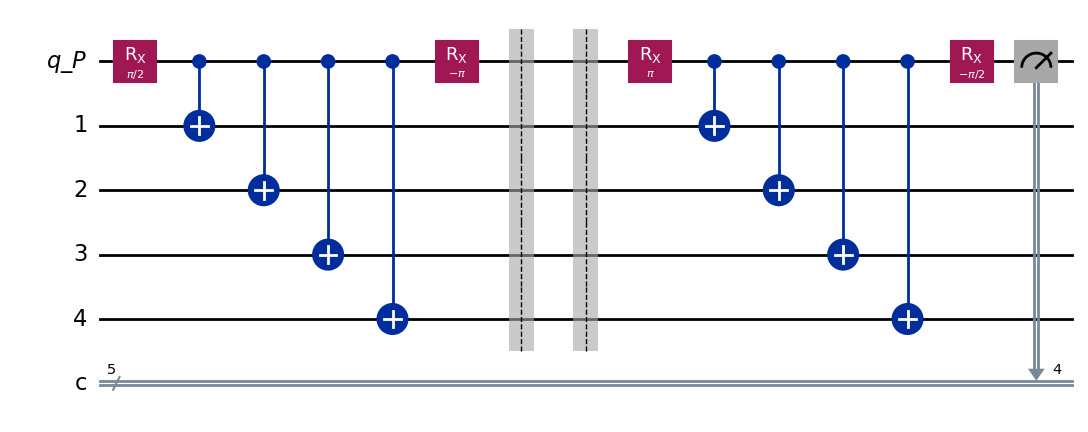

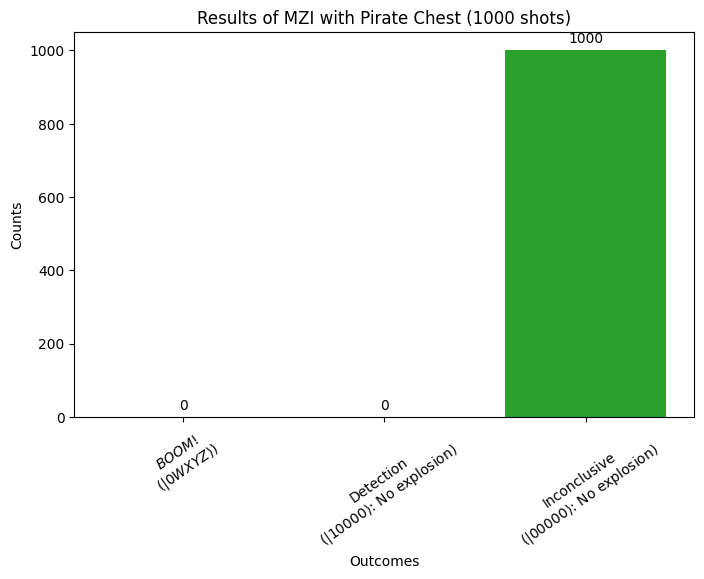

# Collumn  1


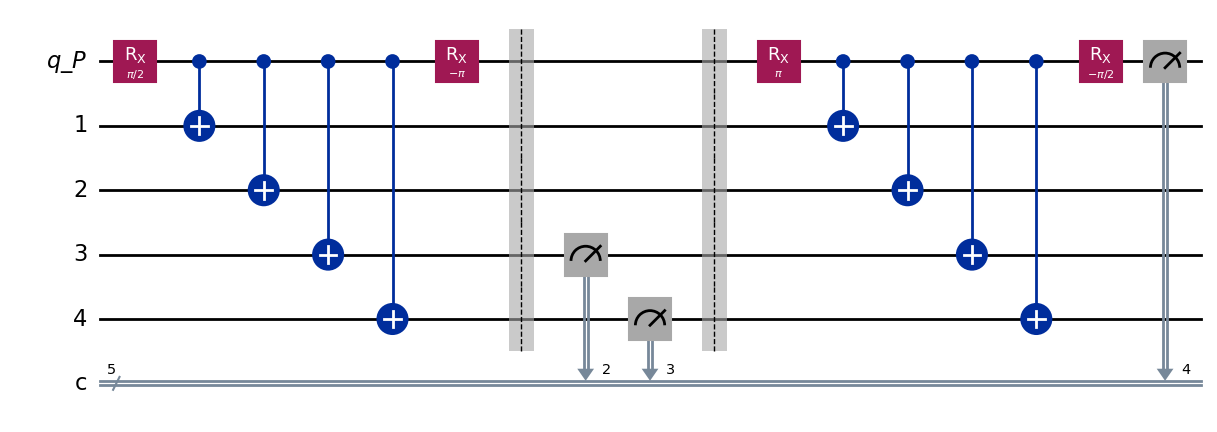

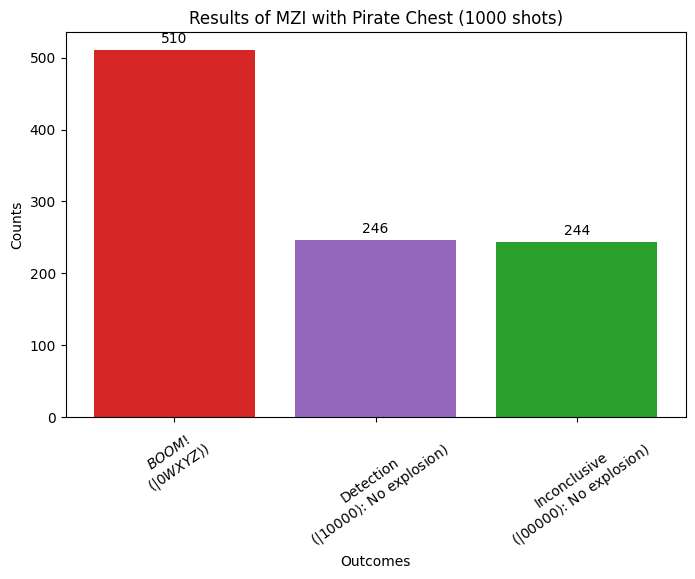

# Collumn  2


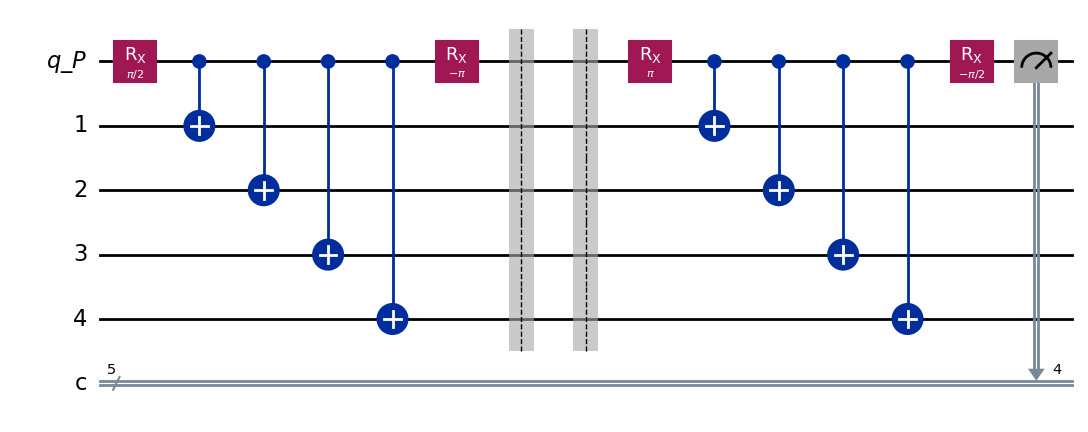

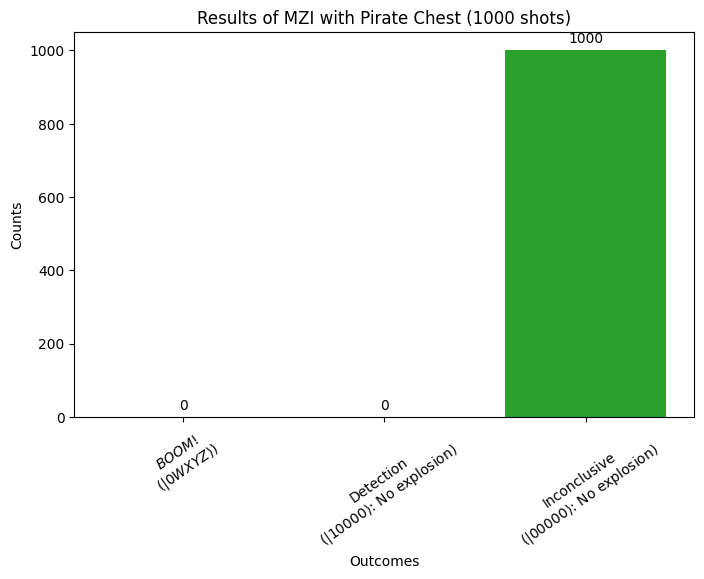

# Collumn  3


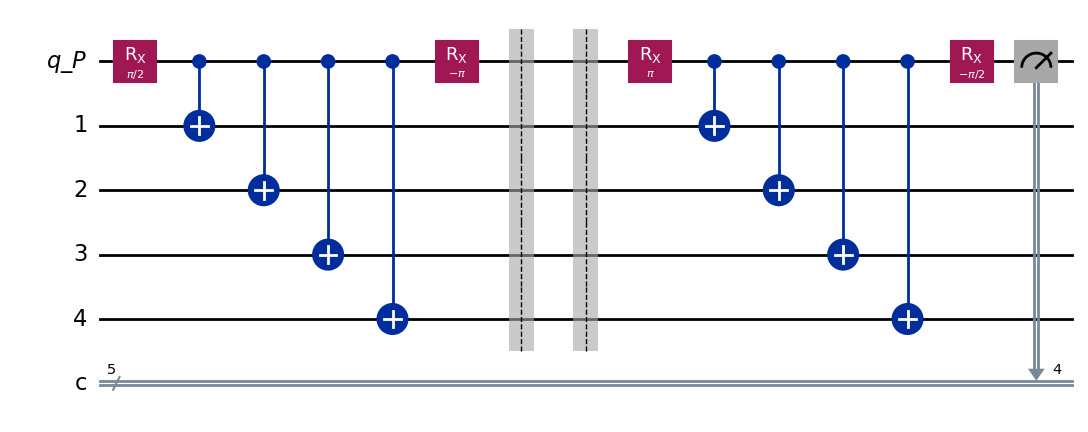

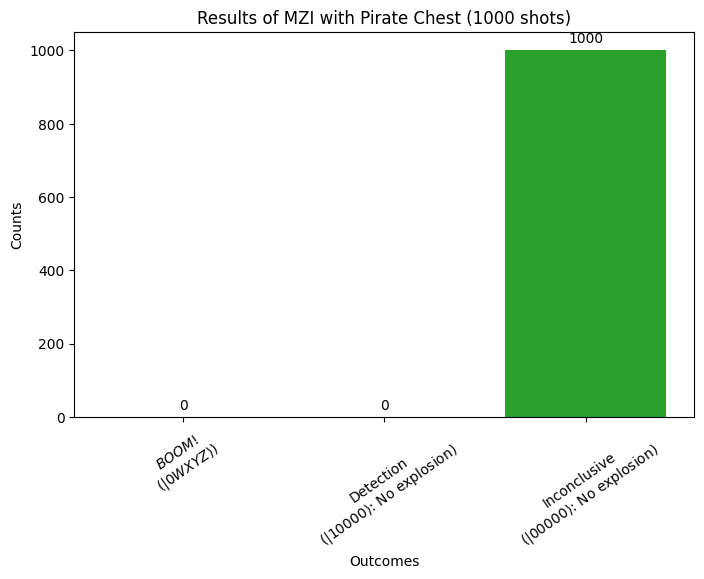

# Row  0


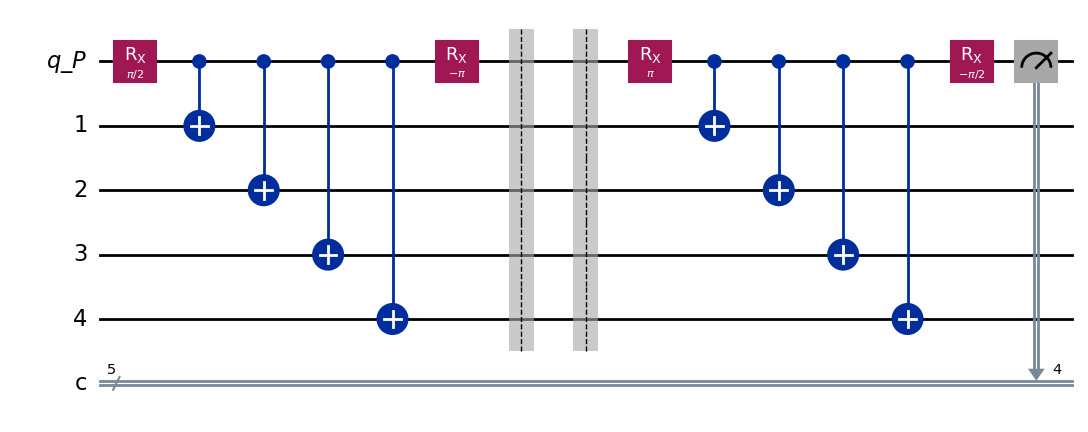

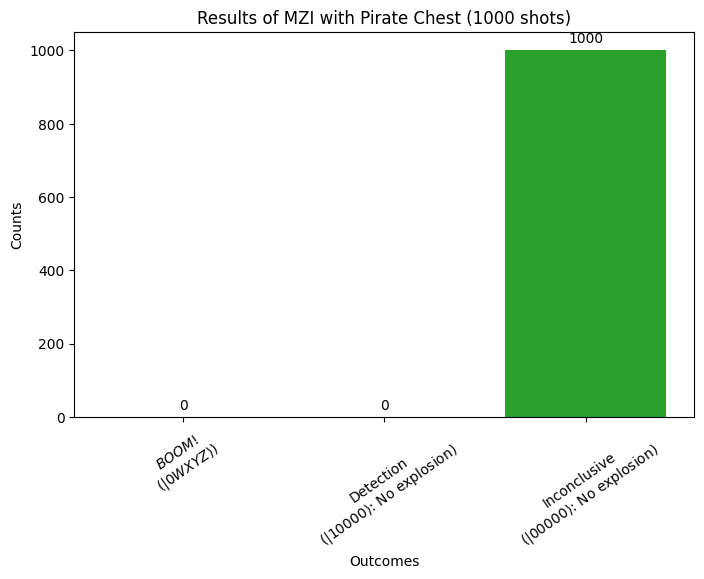

# Row  1


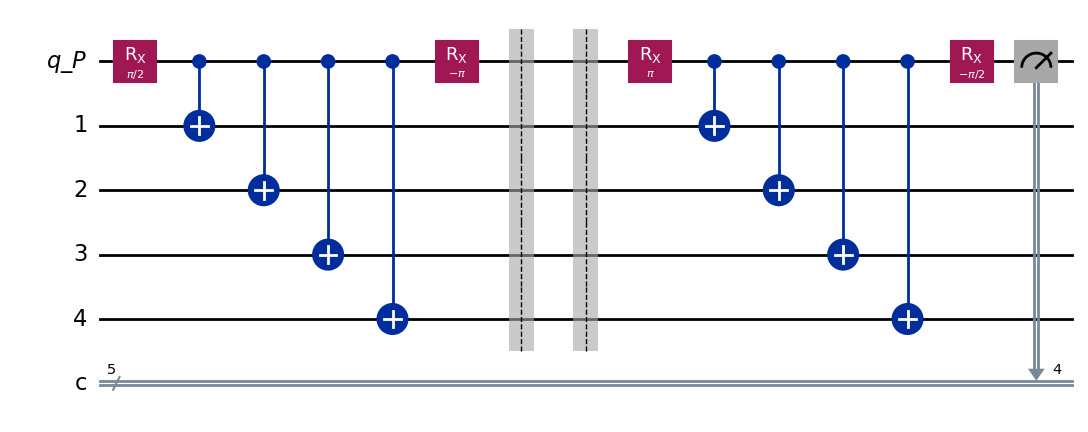

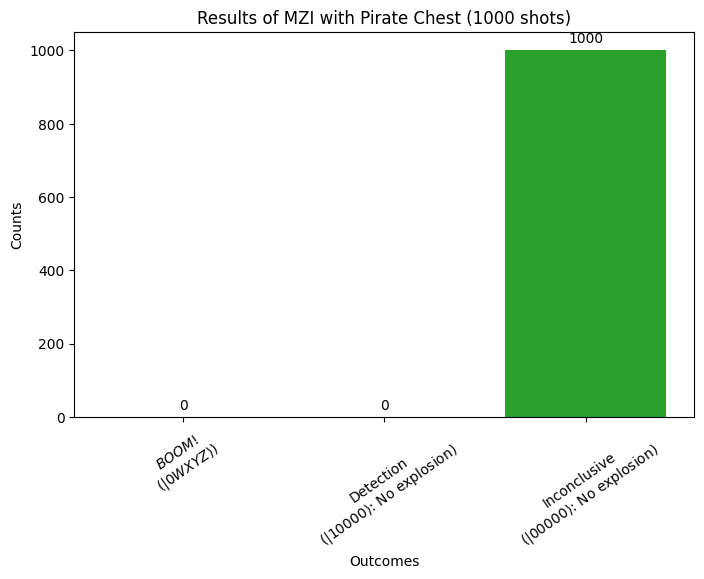

# Row  2


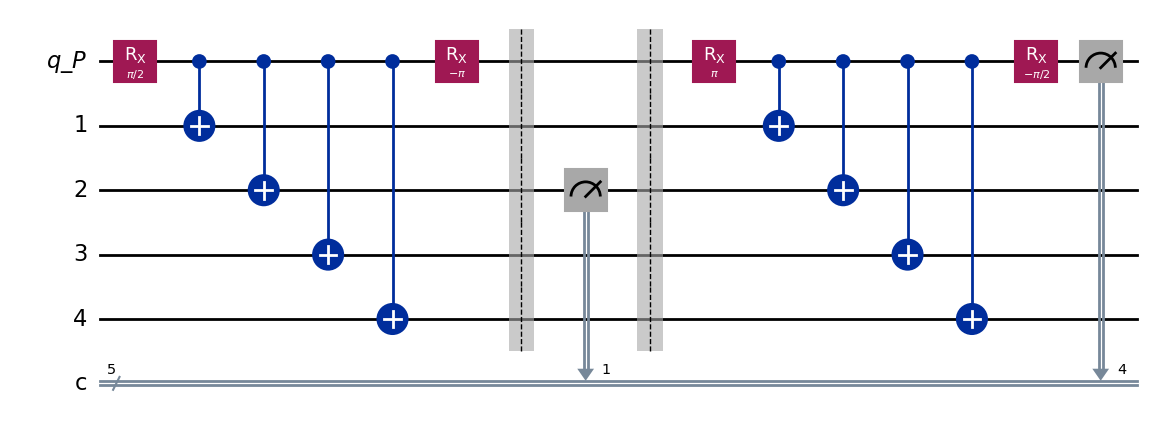

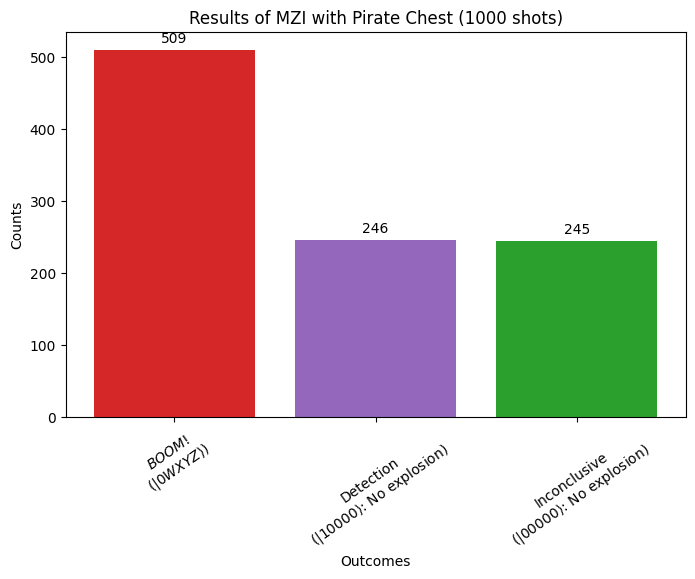

# Row  3


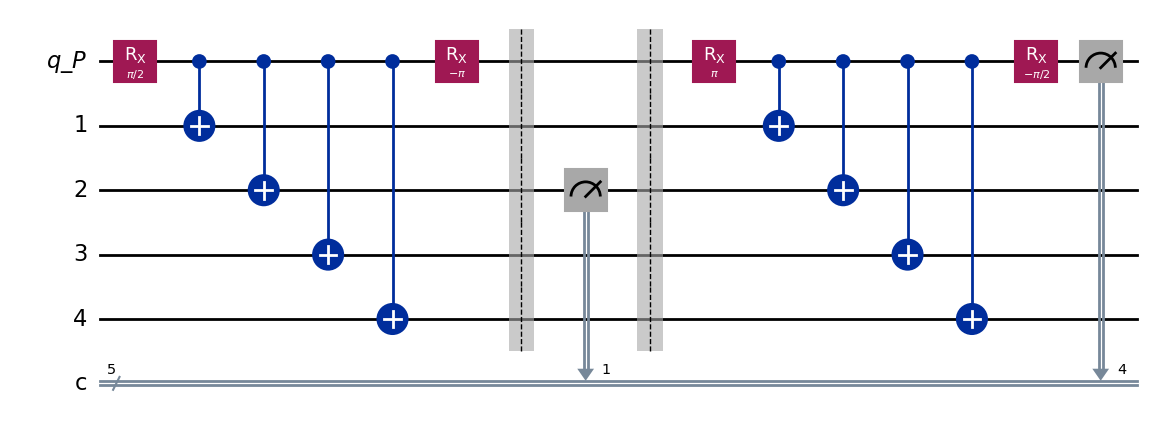

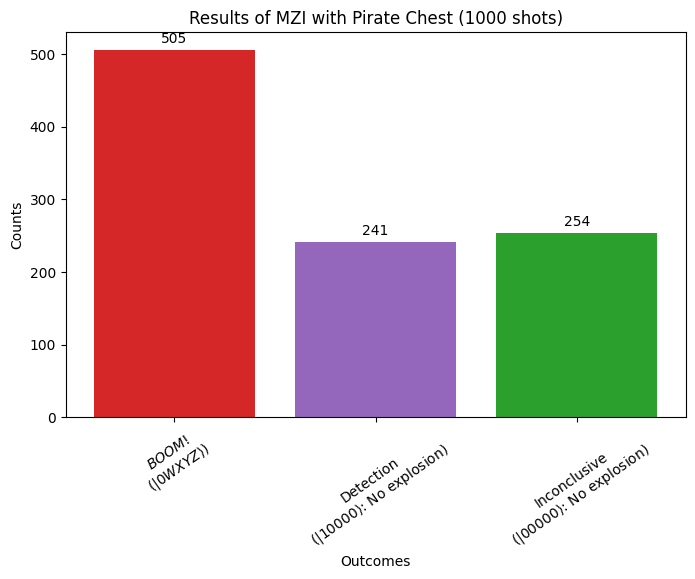

Chests with parchment found in rows: [1]
Chests with parchment found in collumns: [2, 3]
num_measurements =  8
EV* = 0.253


In [ ]:
shots = 1000

threshold = 0.1*shots

chest_findings_rows = []
chest_findings_collumns = []

num_measurements = 0

plot_circ = True
plot_hist = True

for i, chest_config in enumerate(example_matrix):
    print("# Row ", i)
    qc = create_mzi_with_chest_circuit_matrix(chest_list=chest_config, plot=plot_circ)

    counts = run_mzi_simulation(qc, shots=shots)
    categorized_counts, labels = categorize_counts_matrix(counts)
    if plot_hist:
        plot_mzi_results(categorized_counts, title='Results of MZI with Pirate Chest (1000 shots)')

    if counts.get('00000', 0) < shots-threshold:
        chest_findings_rows.append(i)

    num_measurements += 1
        

for i, chest_config in enumerate(example_matrix.T):
    print("# Collumn ", i)
    qc = create_mzi_with_chest_circuit_matrix(chest_list=chest_config, plot=plot_circ)

    counts = run_mzi_simulation(qc, shots=shots)
    categorized_counts, labels = categorize_counts_matrix(counts)

    if plot_hist:
        plot_mzi_results(categorized_counts, title='Results of MZI with Pirate Chest (1000 shots)')

    if counts.get('00000', 0) < shots-threshold:
        chest_findings_collumns.append(i)

    num_measurements += 1

print("Chests with parchment found in rows:", chest_findings_rows)
print("Chests with parchment found in collumns:", chest_findings_collumns)

print("num_measurements = ", num_measurements)

ev = 2.02709 # see above

ev_star = ev / num_measurements

print(f'EV* = {ev_star:.3f}')

# Note

The implemented search algothim is not sufficient to search for parchaments in non-sparse matrices. Algorthims like 2D-binary search would be more accurate

## 🌌 A Pirate’s Farewell

Congratulations, brave quantum pirate! 🏴‍☠️  

You've now mastered the art of detecting parchments inside the treasure chests using the legendary **Mack–Zenn Dar interferometer**. With the clever modifications and cunning strategies you devised, you’ve earned your place among the distinguished pirate-scholars of legend — alongside Mack, Zenn Dar, Eli Vey, and Vaid Mar!  

Yet, even as the moonlight glints off the turquoise waves, a new challenge beckons: **how might one quantum teleport the parchments’ information from inside the chests**, revealing their secrets without ever opening them and risking their destruction?  

But the night grows late, the ship rocks gently on the tides, and our crew’s eyes grow heavy. This tantalizing puzzle shall remain for another starry night, waiting for your next daring adventure. 🌠  

For now, rest easy — the seas of quantum knowledge have been charted, and your name sails with the legends.

---


## A Note from the Organizers

We hope you’ve enjoyed working through this hackathon! It was an absolute blast for us to write this prompt, and we hope you had just as much fun solving it.  

Until next time, may your quantum voyages be successful—and may all your parchments remain intact! 🏴‍☠️  

— Afonso & Leon

**Acknowledgements:** We’d like to thank IBM Quantum and BasQ for the initial idea of a Quantum Battleship game based on the Elitzur-Vaidman Bomb Tester, which we then reworked into the pirate-y fantasy you’ve seen here.